In [387]:
## import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm

from sklearn.linear_model import LogisticRegression

from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [388]:
## load the data sets
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [389]:
## Explore the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [390]:
## check for null values in training data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [391]:
## check for null values in test data 
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [392]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


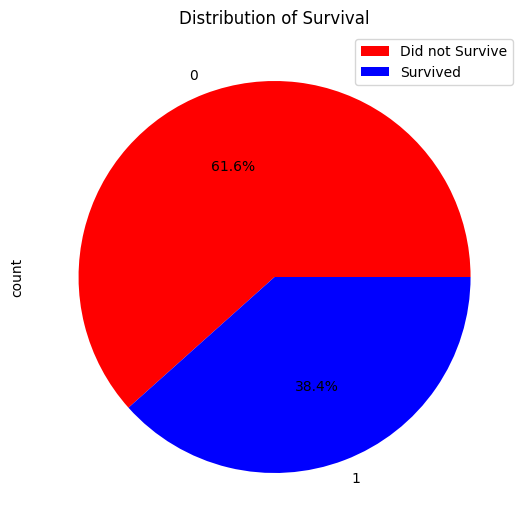

In [393]:
## Visualise the Survival rate for all passengers

fig, ax = plt.subplots(figsize=(5,5))
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red','blue'])
plt.title('Distribution of Survival')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

In [394]:
## Look at the object data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


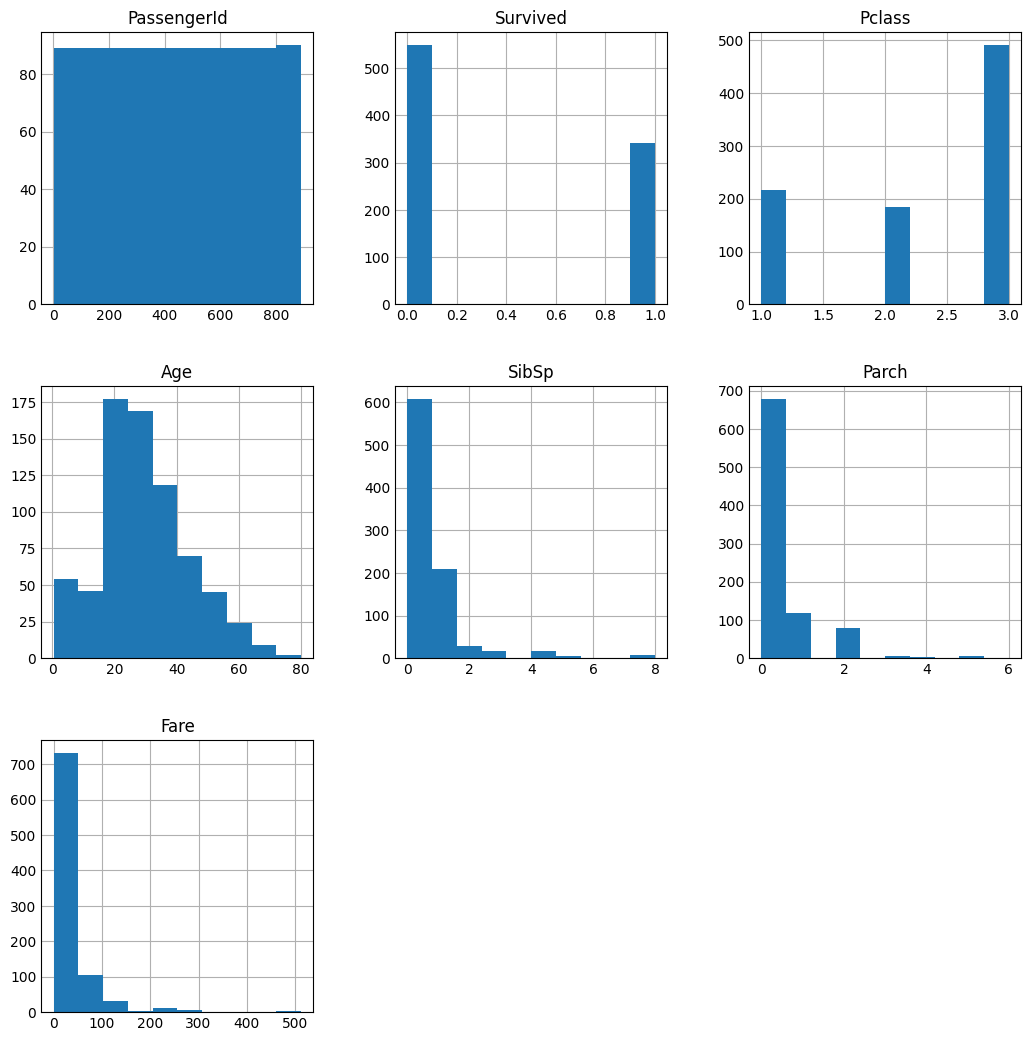

In [395]:
## histogram to look at the distibutions of the data to help make decisions about missing values
train_data.hist(bins=10, figsize=(10,10))
plt.show()

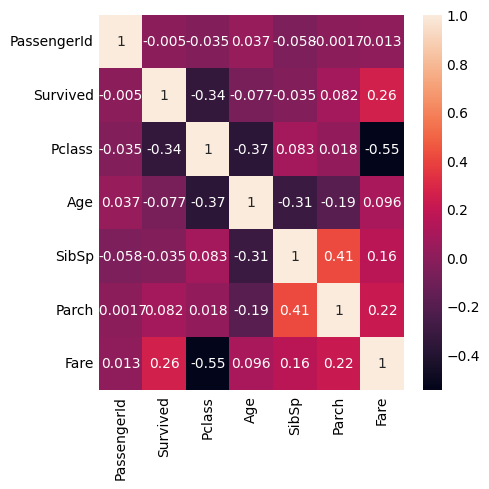

In [396]:
# Select only numeric columns and make a correlation matrix to consider which variables to look at in more detail
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
plt.figure(figsize=(5,5))
corr_mat = numeric_data.corr()
sns.heatmap(corr_mat, annot=True)
plt.tight_layout()
plt.show()

In [397]:
## Look at what variables influence survival starting with Pclass
train_data.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


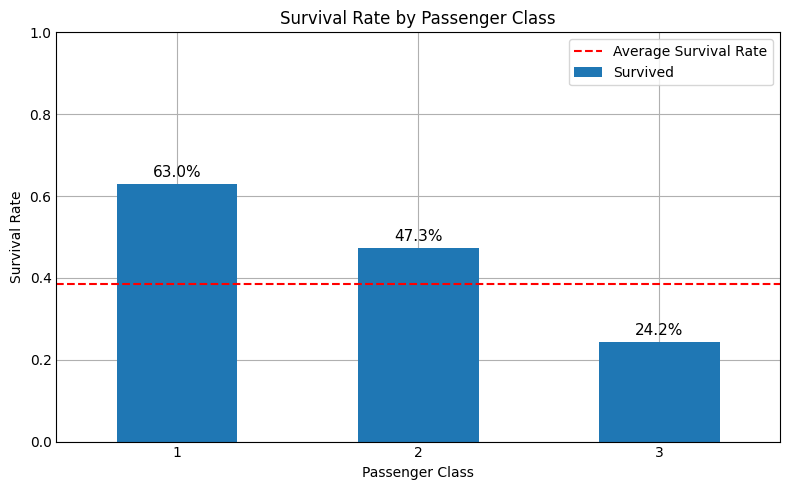

In [398]:
## plot the variables to show visually
## Pclass survival rate
fig, ax = plt.subplots(figsize=(8,5))
train_data.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax,)
plt.ylim(0, 1)

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

for i, v in enumerate(train_data.groupby('Pclass')['Survived'].mean()):
    percentage = f'{v:.1%}'  # Format as percentage
    plt.text(i, v + 0.01, percentage, 
             ha='center', va='bottom',
             fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend()
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()


In [399]:
train_data.groupby(['Pclass'], as_index=False)['Age'].median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [400]:
## Look at how Sex affects survival
train_data.groupby(['Sex'], as_index=False)['Age'].median()

,Sex,Age
0,female,27.0
1,male,29.0


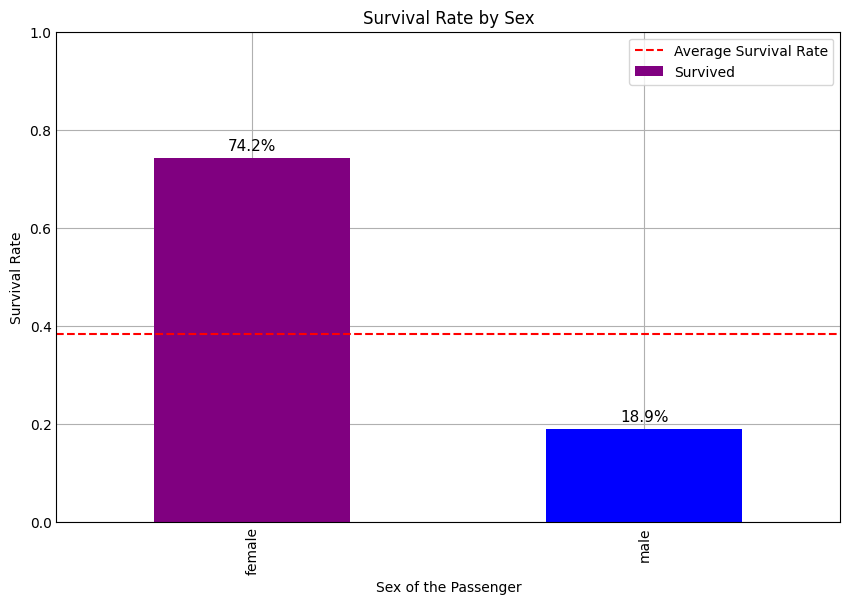

In [401]:
## Sex survival rate visuals
fig, ax = plt.subplots(figsize=(8,5))
train_data.groupby('Sex')['Survived'].mean().plot(kind='bar', color= ['purple','blue'],ax=ax,)
plt.ylim(0,1)

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

# Add labels on top of each bar
for i, v in enumerate(train_data.groupby('Sex')['Survived'].mean()):
    percentage = f'{v:.1%}'  # Format as percentage
    plt.text(i, v + 0.01, percentage, 
             ha='center', va='bottom',
             fontsize=11)
plt.legend()
plt.title('Survival Rate by Sex')
plt.xlabel('Sex of the Passenger')
plt.ylabel('Survival Rate')
plt.show()

In [402]:
## Look at how age affects survival
train_data.groupby(['Age'], as_index=False)['Survived'].mean()

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


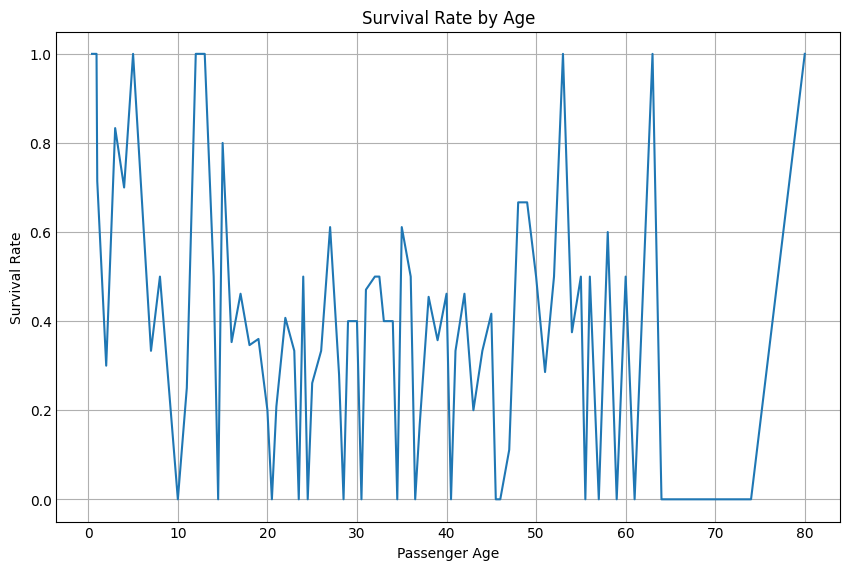

In [403]:
## Age survival rate
fig, ax = plt.subplots(figsize=(8,5))
train_data.groupby('Age')['Survived'].mean().plot(kind='line', ax=ax,)
plt.title('Survival Rate by Age')
plt.xlabel('Passenger Age')
plt.ylabel('Survival Rate')
plt.show()

In [404]:
## Create age categories to assess age more effectively
def categorize_age(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 35:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train_data['Age_Category'] = train_data['Age'].apply(categorize_age)
train_data['Age_Category'].value_counts()

Age_Category
Young Adult    366
Adult          209
Unknown        177
Child           68
Teen            45
Senior          26
Name: count, dtype: int64

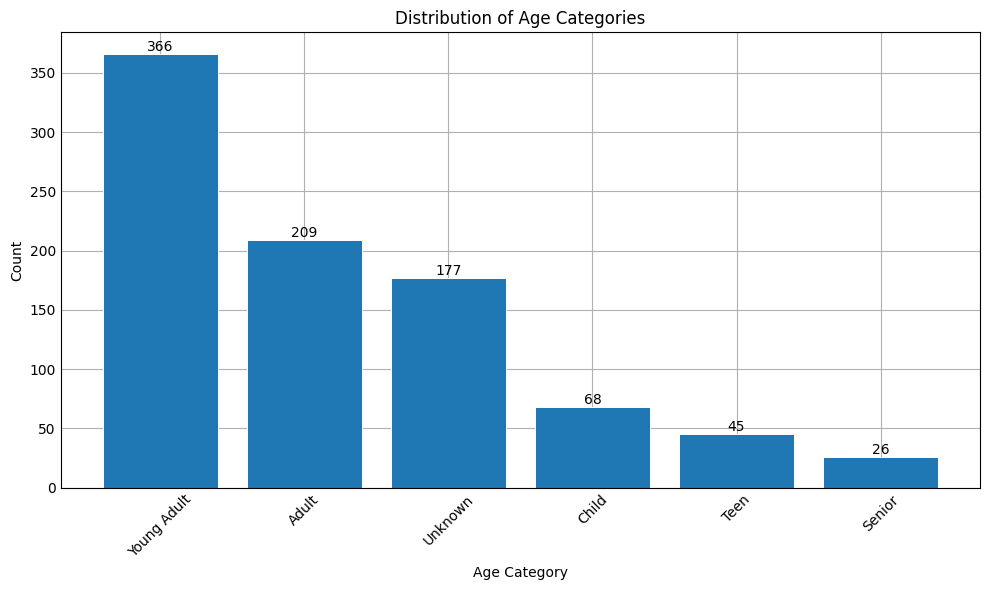

In [405]:
plt.style.use('_mpl-gallery')

# Get value counts first
age_counts = train_data['Age_Category'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Create bar plot using the index (categories) and values
ax.bar(age_counts.index, age_counts.values, 
       edgecolor="white", linewidth=0.7)

# Customize the plot
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Rotate x-labels if needed
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [406]:
## Look at how the age categories survived
train_data.groupby(['Age_Category'], as_index=False)['Survived'].mean()

,Age_Category,Survived
0,Adult,0.416268
1,Child,0.573529
2,Senior,0.269231
3,Teen,0.488889
4,Unknown,0.293785
5,Young Adult,0.368852


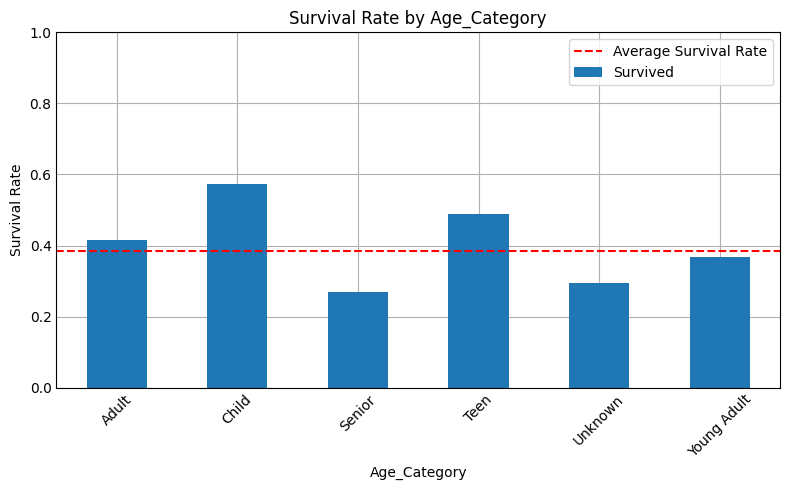

In [407]:
## plot the variables to show visually
## Age category survival rate
fig, ax = plt.subplots(figsize=(8,5))
train_data.groupby('Age_Category')['Survived'].mean().plot(kind='bar', ax=ax,)

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

plt.xticks(rotation=45)
plt.legend()
plt.ylim(0,1)
plt.title('Survival Rate by Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

In [408]:
## Consider the unknown ages - highest correlation in the matrix is wth Pclass
train_data.groupby(['Pclass'], as_index=False)['Age'].median()
## use these values when age is unknown - to fill the missing values in the test and train data sets

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


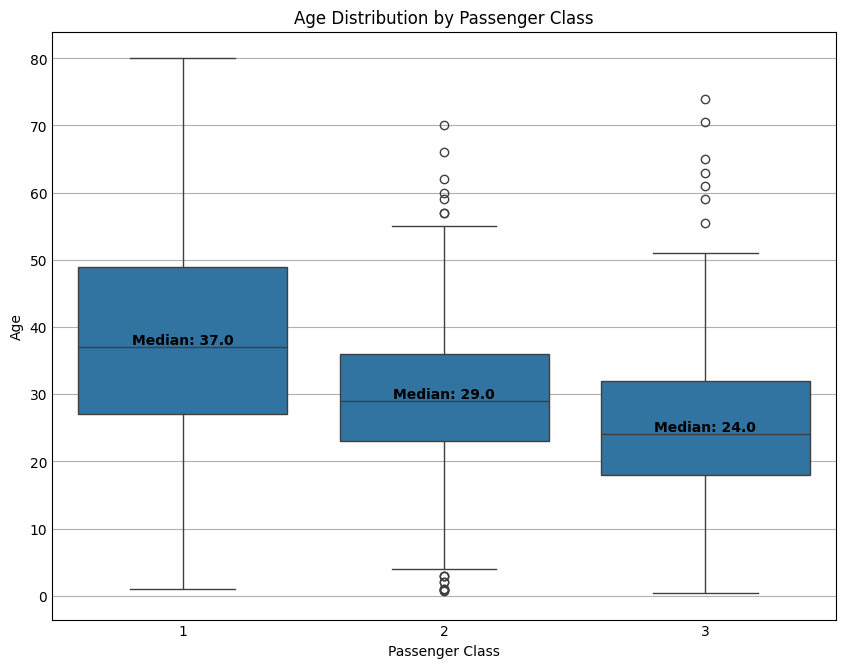

In [409]:
## Visualising the age ranges in Pclass

plt.figure(figsize=(8,6))

# Create box plot
ax = sns.boxplot(x='Pclass', y='Age', data=train_data)

# Calculate medians for each class
medians = train_data.groupby('Pclass')['Age'].median()

# Add median values as text annotations
for i, median in enumerate(medians):
    ax.text(i, median, f'Median: {median:.1f}', 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontweight='bold')

plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [410]:
## Look at the  passenger sibling and spouse number survival rates
train_data.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


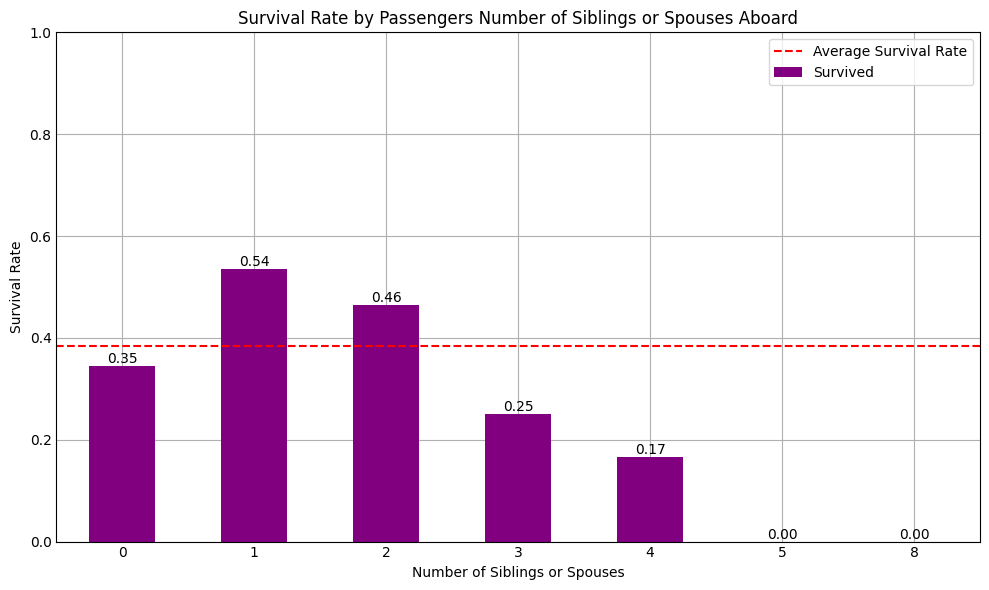

In [411]:
## Visualise the SibSp survival rate
fig, ax = plt.subplots(figsize=(10,6))
train_data.groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=ax, color='purple',linewidth=0)  

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')
plt.ylim(0,1)
plt.title('Survival Rate by Passengers Number of Siblings or Spouses Aboard')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Survival Rate')

# Add value labels on top of bars
for i, v in enumerate(train_data.groupby('SibSp')['Survived'].mean()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


In [412]:
## Look at the passenger parents and children number aboard and survival rates
train_data.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


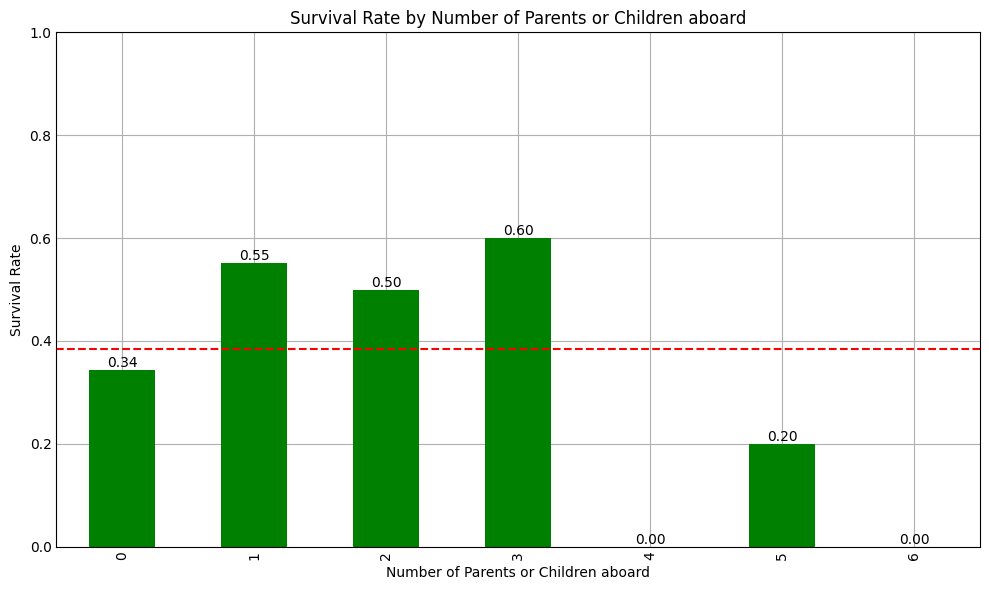

In [413]:
## Visualise the Passenger survival rates by number of parents or children aboard
fig, ax = plt.subplots(figsize=(10,6))
train_data.groupby('Parch')['Survived'].mean().plot(kind='bar', ax=ax, color='green',linewidth=0)  

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')


plt.ylim(0,1)
plt.title('Survival Rate by Number of Parents or Children aboard')
plt.xlabel('Number of Parents or Children aboard')
plt.ylabel('Survival Rate')

# Add value labels on top of bars
for i, v in enumerate(train_data.groupby('Parch')['Survived'].mean()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [414]:
## Look at the passenger parents and children number aboard and survival rates
train_data.groupby(['Fare'], as_index=False)['Survived'].mean()

,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
...,...,...
243,227.5250,0.750000
244,247.5208,0.500000
245,262.3750,1.000000
246,263.0000,0.500000


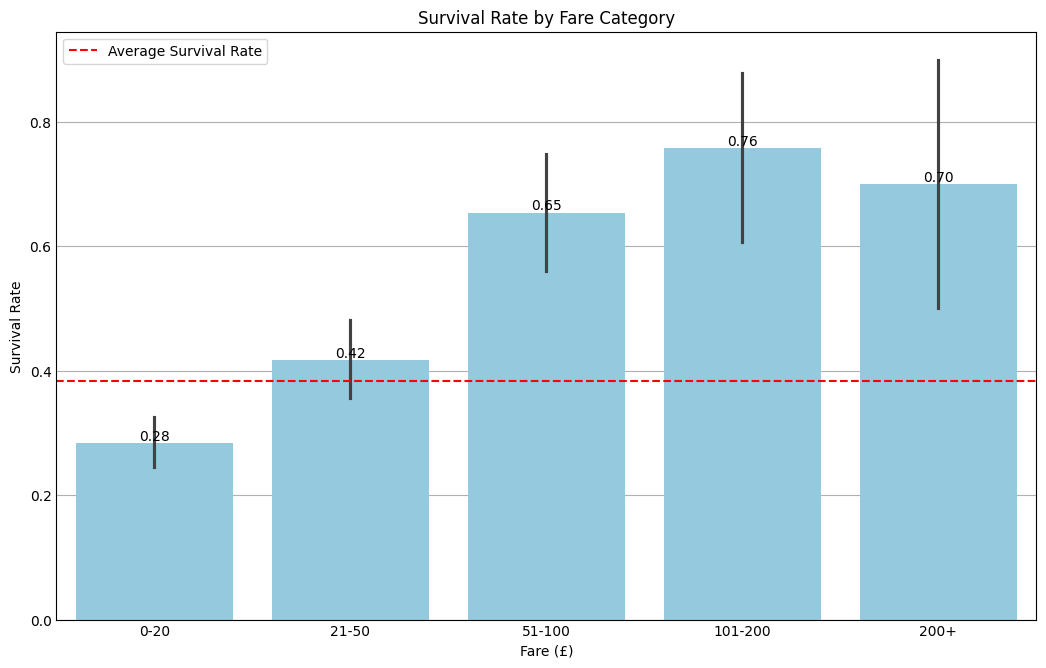

In [415]:
# Create fare bins
bins = [0, 20, 50, 100, 200, 600]
labels = ['0-20', '21-50', '51-100', '101-200', '200+']
train_data['Fare_Category'] = pd.cut(train_data['Fare'], bins=bins, labels=labels)

# Create plot
plt.figure(figsize=(10,6))
sns.barplot(x='Fare_Category', y='Survived', data=train_data, color='skyblue', linewidth=0)

# Add mean line
plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

plt.title('Survival Rate by Fare Category')
plt.xlabel('Fare (£)')
plt.ylabel('Survival Rate')

# Add value labels
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

plt.legend()
plt.show()

In [416]:
## Look at the passenger embarkment location and survival rates
train_data.groupby(['Embarked'], as_index=False)['Survived'].mean()



,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


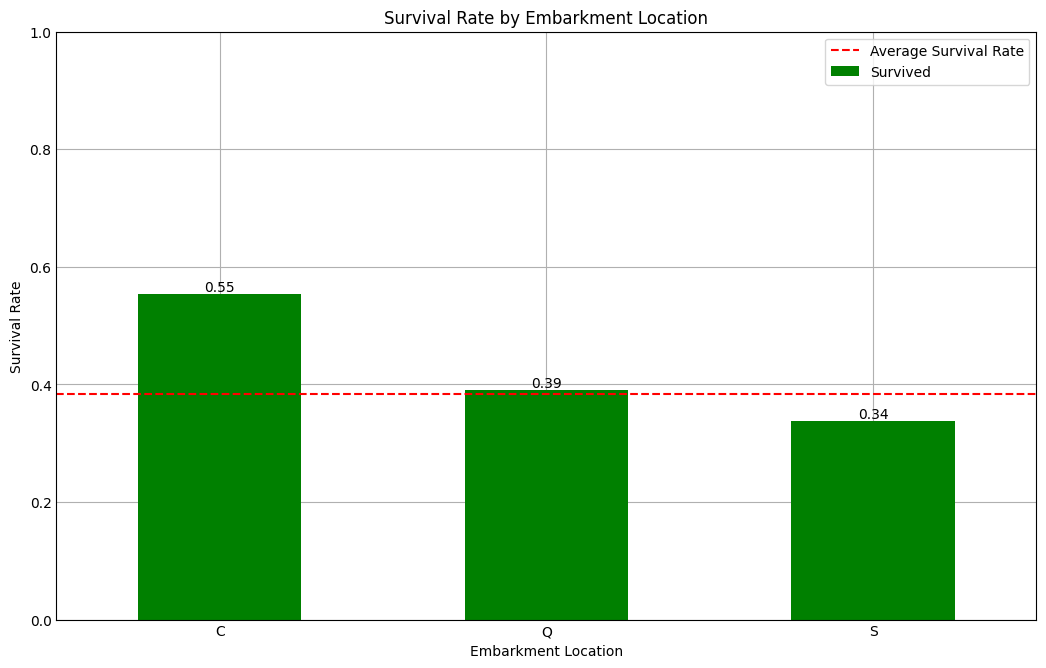

In [417]:
## Visualise the Embarkment survival 
fig, ax = plt.subplots(figsize=(10,6))
train_data.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=ax, color='green',linewidth=0) 
plt.ylim(0,1) 

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')


plt.ylim(0,1)
plt.title('Survival Rate by Embarkment Location')
plt.xlabel('Embarkment Location')
plt.ylabel('Survival Rate')

plt.xticks(rotation= 0)
# Add value labels on top of bars
for i, v in enumerate(train_data.groupby('Embarked')['Survived'].mean()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.legend()
plt.show()

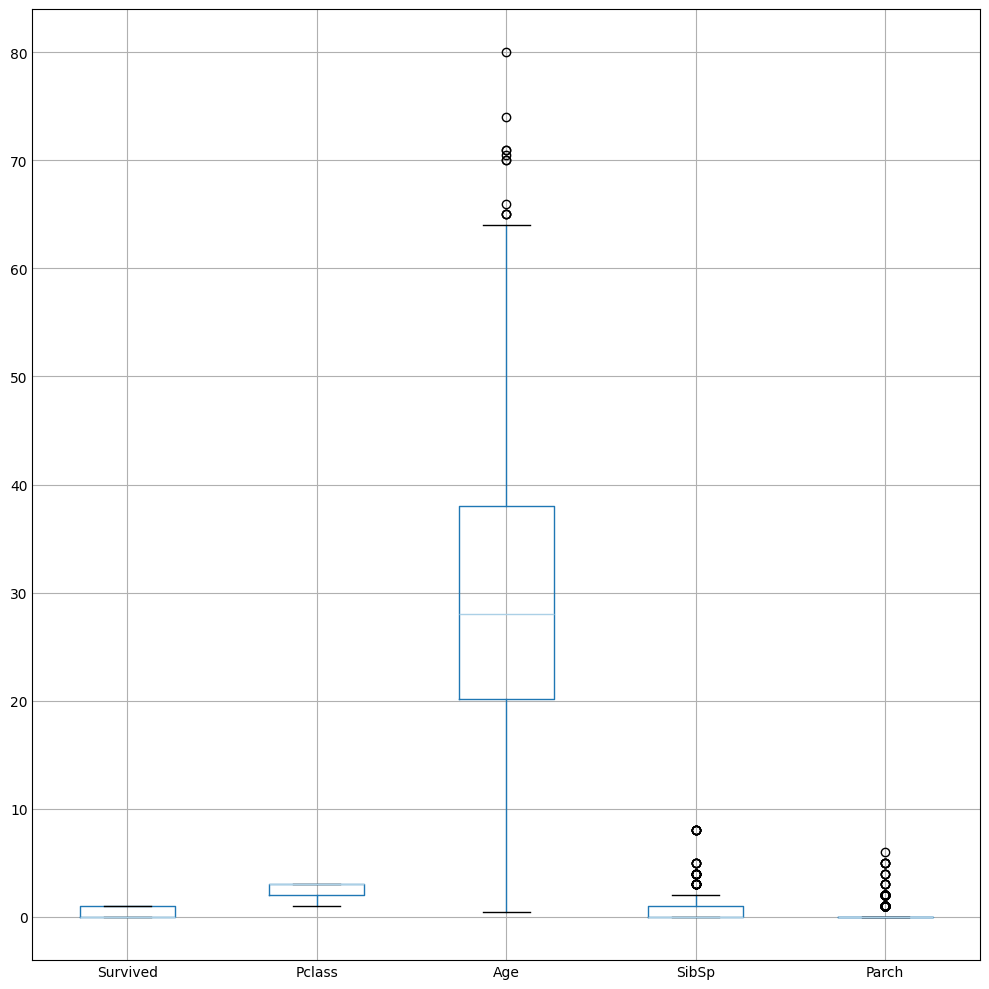

In [418]:
## Check which of the variables have outliers
# Using iloc to exclude first column and last three columns
train_data.iloc[:, 1:-5].boxplot(figsize=(10,10))
plt.tight_layout()

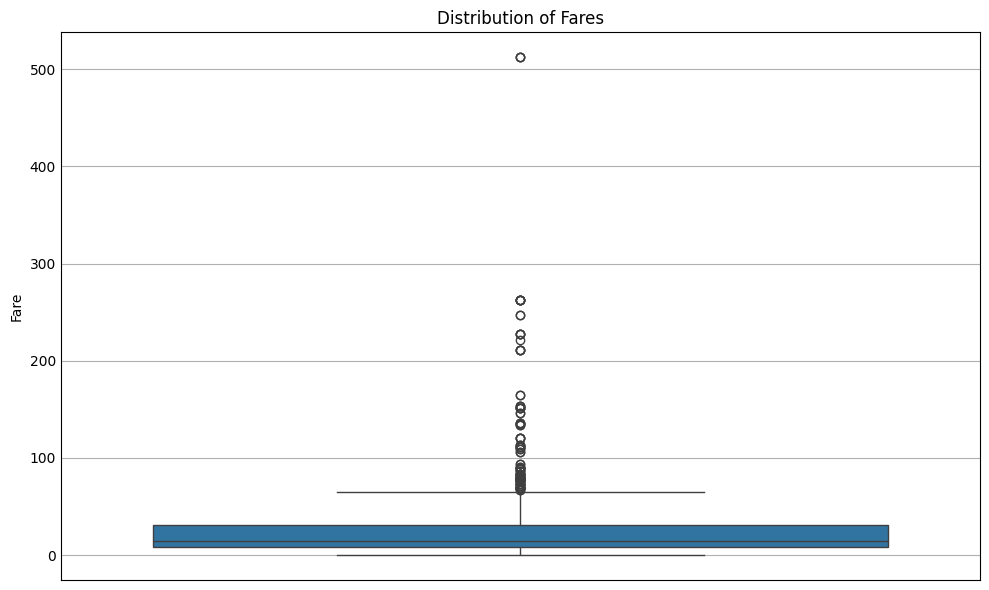

In [419]:
## check fares for outliers as it has missing values in the test set
plt.figure(figsize=(10,6))
sns.boxplot(y=train_data['Fare'])
plt.title('Distribution of Fares')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

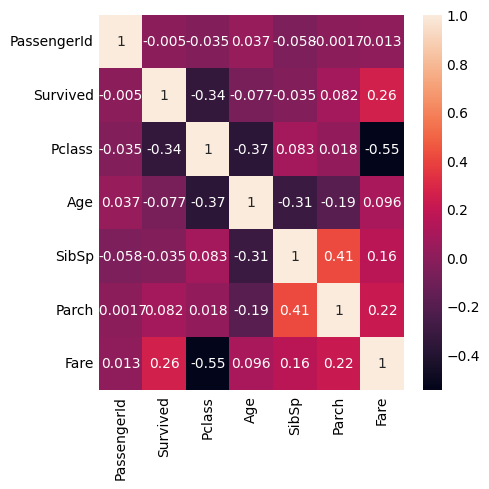

In [420]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
plt.figure(figsize=(5,5))
corr_mat = numeric_data.corr()
sns.heatmap(corr_mat, annot=True)
plt.tight_layout()
plt.show()

In [421]:
## fill in the missing ages using the median ages from the classes
train_data['Age'] = train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('median'))
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0-20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,51-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0-20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,51-100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0-20


In [422]:
## check the null values again now age has been added
train_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_Category       0
Fare_Category     15
dtype: int64

In [423]:
## apply the missing values to the correct category
train_data['Age_Category'] = train_data['Age'].apply(categorize_age)
train_data['Age_Category'].value_counts()

Age_Category
Young Adult    513
Adult          239
Child           68
Teen            45
Senior          26
Name: count, dtype: int64

C:\Users\lynsk\AppData\Local\Temp\ipykernel_2728\1746736300.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby('Age_Category')['Survived'].mean().plot(kind='bar', ax=ax,)


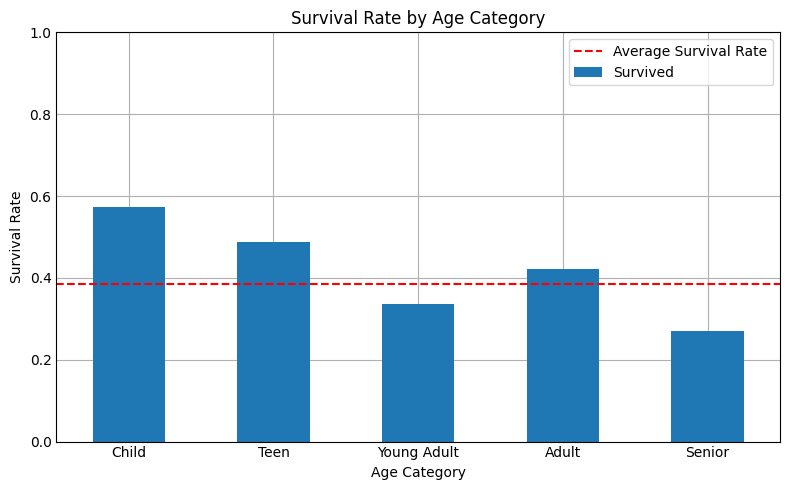

In [424]:
## Visualise the age categories and survival rates 
age_order = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
train_data['Age_Category'] = pd.Categorical(train_data['Age_Category'], categories=age_order, ordered=True)

fig, ax = plt.subplots(figsize=(8,5))
train_data.groupby('Age_Category')['Survived'].mean().plot(kind='bar', ax=ax,)

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

plt.ylim(0,1)
plt.legend()
plt.title('Survival Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

C:\Users\lynsk\AppData\Local\Temp\ipykernel_2728\1444491293.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby('Age_Category')['Survived'].mean().plot(kind='bar', ax=ax)


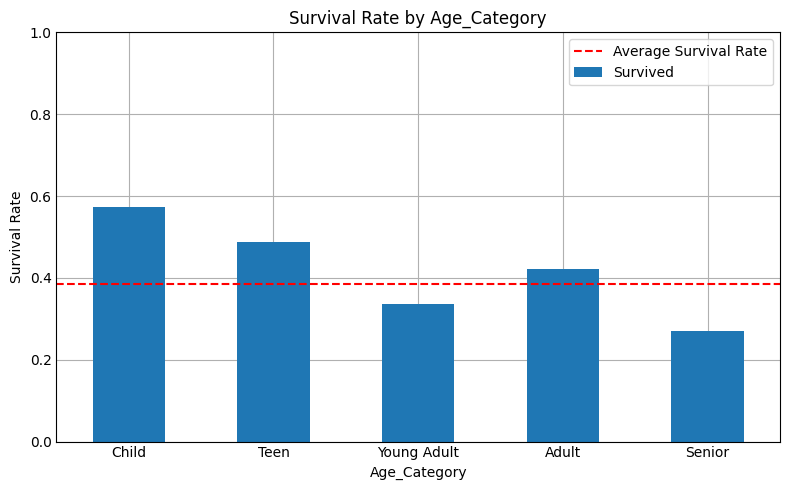

In [425]:

# Define the desired order of age categories
age_order = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
train_data['Age_Category'] = pd.Categorical(train_data['Age_Category'], categories=age_order, ordered=True)

# Visualise the age categories and survival rates 
fig, ax = plt.subplots(figsize=(8,5))
train_data.groupby('Age_Category')['Survived'].mean().plot(kind='bar', ax=ax)

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

plt.ylim(0,1)
plt.legend()
plt.title('Survival Rate by Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Survival Rate')

# Set x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [426]:
## fill in the missing 2 missing embarked values with the mode as it is categorical
# Fill missing Embarked values with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Verify the change
print("Number of null values:", train_data['Embarked'].isnull().sum())
print("\nValue counts:")
print(train_data['Embarked'].value_counts())

Number of null values: 0

Value counts:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


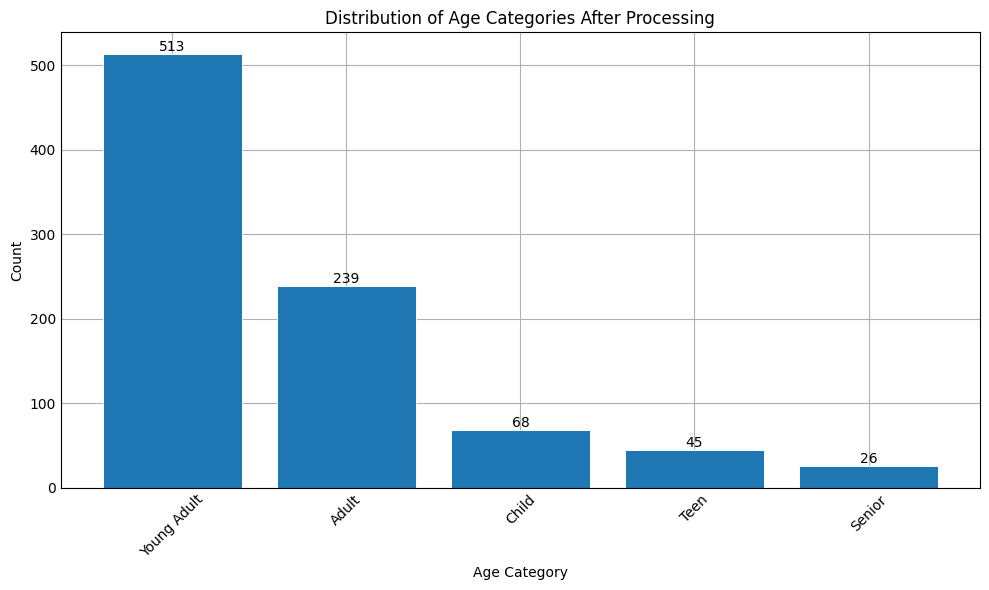

In [427]:
## Visualise the number of age categories after adding in the missing values
train_data['Age_Category'] = train_data['Age'].apply(categorize_age)
train_data['Age_Category'].value_counts()

plt.style.use('_mpl-gallery')

# Get value counts first
age_counts = train_data['Age_Category'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Create bar plot using the index (categories) and values
ax.bar(age_counts.index, age_counts.values, 
       edgecolor="white", linewidth=0.7)

# Customize the plot
plt.title('Distribution of Age Categories After Processing')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Rotate x-labels if needed
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

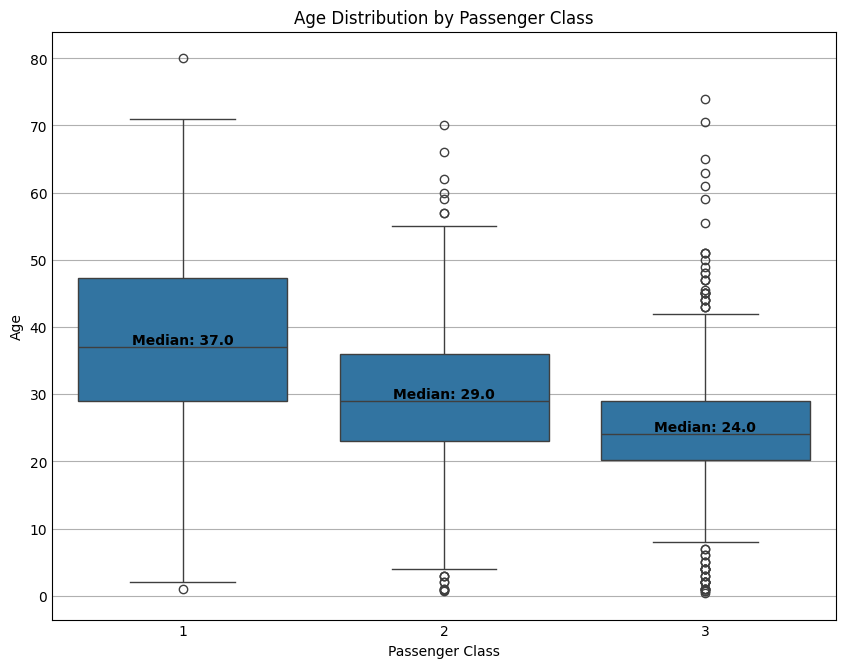

In [428]:
plt.figure(figsize=(8,6))

# Create box plot
ax = sns.boxplot(x='Pclass', y='Age', data=train_data)

# Calculate medians for each class
medians = train_data.groupby('Pclass')['Age'].median()

# Add median values as text annotations
for i, median in enumerate(medians):
    ax.text(i, median, f'Median: {median:.1f}', 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontweight='bold')

plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [429]:

## encode the data for the training model
encoder = LabelEncoder()
train_data['Sex'] =encoder.fit_transform(train_data['Sex'])
train_data['Age_Category'] =encoder.fit_transform(train_data['Age_Category'])
train_data['Embarked'] =encoder.fit_transform(train_data['Embarked'])

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,4,0-20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,51-100
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,4,0-20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,51-100
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,0-20


In [430]:
## checking encoded data 
train_data['Age_Category'].value_counts()

Age_Category
4    513
0    239
1     68
3     45
2     26
Name: count, dtype: int64

In [431]:
## checking encoded data
train_data.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


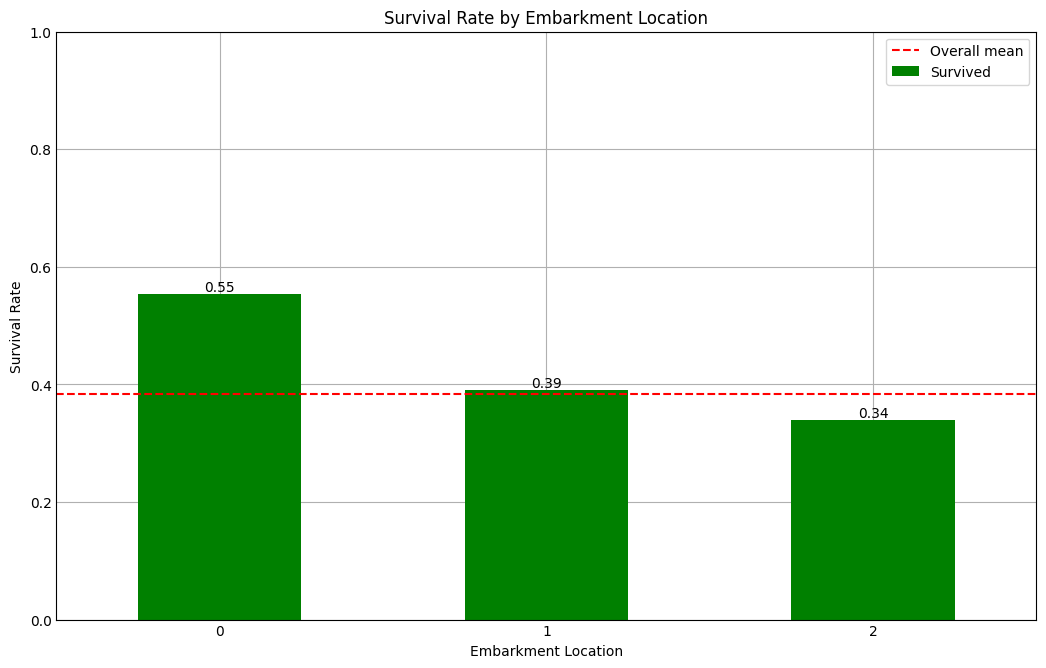

In [432]:
## Visualise the Embarkment survival 
fig, ax = plt.subplots(figsize=(10,6))
train_data.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=ax, color='green',linewidth=0) 
plt.ylim(0,1) 

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Overall mean')



plt.title('Survival Rate by Embarkment Location')
plt.xlabel('Embarkment Location')
plt.ylabel('Survival Rate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add value labels on top of bars
for i, v in enumerate(train_data.groupby('Embarked')['Survived'].mean()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.legend()

plt.show()

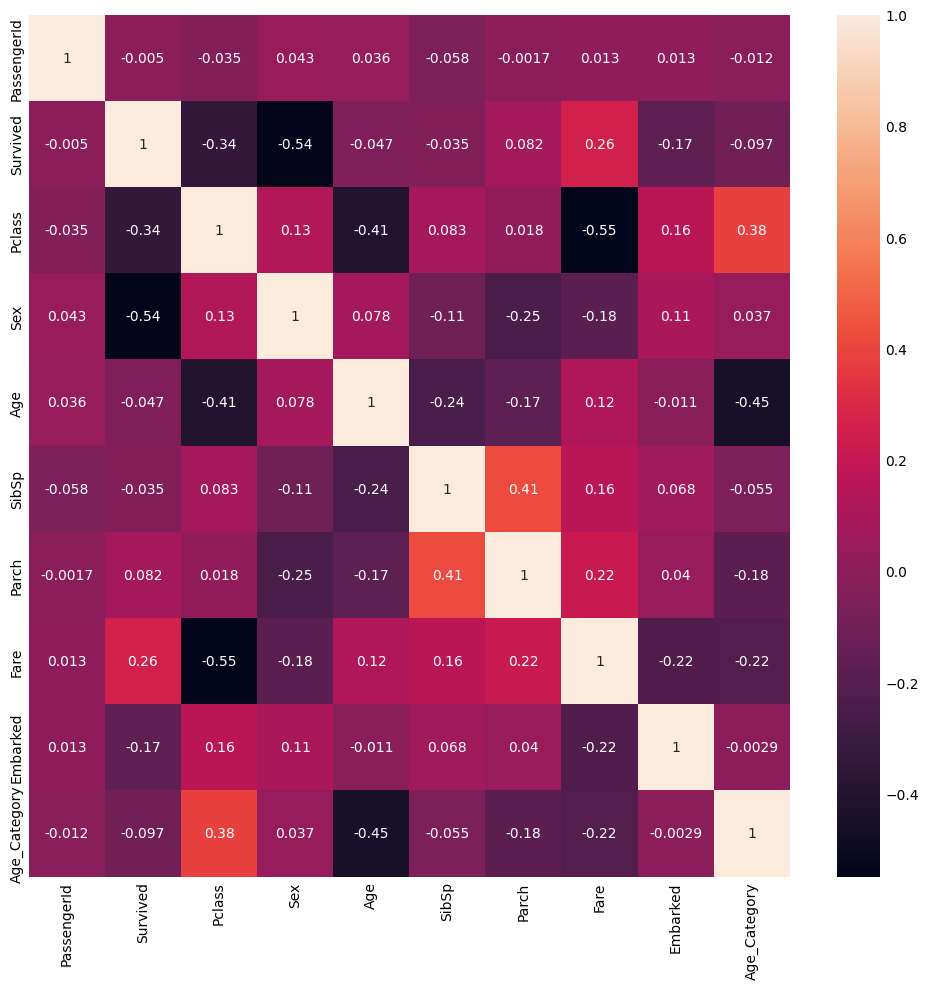

In [433]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
plt.figure(figsize=(10,10))
corr_mat = numeric_data.corr()
sns.heatmap(corr_mat, annot=True)
plt.tight_layout()
plt.show()

In [434]:
# Extract titles from the name column
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
# Look at unique titles
print("Unique titles found:")
print(train_data['Title'].value_counts())

Unique titles found:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [435]:
# Look at unique titles in test data
print("Unique titles found:")
print(test_data['Title'].value_counts())

Unique titles found:
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [436]:
## Map them to title categories so it works across test and train data

# Create the mapping
title_mapping = {
   # Common titles
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    
    # Military/Naval
    'Col': 'Military',
    'Major': 'Military',
    'Capt': 'Military',
    
    # Religious
    'Rev': 'Religious',
    
    # Medical
    'Dr': 'Medical',
    
    # Noble/Upper Class
    'Lady': 'Noble Female',
    'Sir': 'Noble Male',
    'Don': 'Noble Male',
    'Dona': 'Noble Female',
    'Countess': 'Noble Female',
    'Jonkheer': 'Noble Male',
    
    # Variations of Miss/Mrs
    'Mlle': 'Miss',    # Mademoiselle
    'Ms': 'Miss',
    'Mme': 'Mrs'      # Madame
   }

# Apply mapping to test and train data
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)




In [437]:
train_data['Title'].value_counts()


Title
Mr              517
Miss            185
Mrs             126
Master           40
Medical           7
Religious         6
Military          5
Noble Male        3
Noble Female      2
Name: count, dtype: int64

In [438]:
train_data.groupby(['Title'], as_index=True)['Survived'].mean()

Title
Master          0.575000
Medical         0.428571
Military        0.400000
Miss            0.702703
Mr              0.156673
Mrs             0.793651
Noble Female    1.000000
Noble Male      0.333333
Religious       0.000000
Name: Survived, dtype: float64

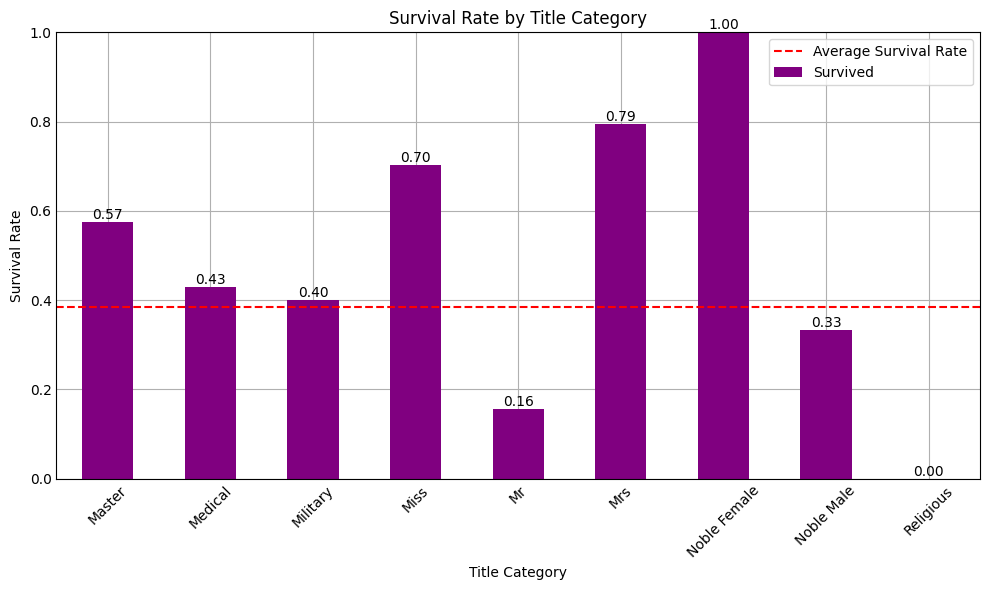

In [439]:

## Visualise the title survival rates
fig, ax = plt.subplots(figsize=(10,6))
train_data.groupby(['Title'], as_index=True)['Survived'].mean().plot(kind='bar', ax=ax, color='purple', linewidth=0)
plt.ylim(0,1)

plt.axhline(y=train_data['Survived'].mean(), color='red', linestyle='--', label='Average Survival Rate')

plt.title('Survival Rate by Title Category')
plt.xlabel('Title Category')
plt.ylabel('Survival Rate')

# Add value labels on top of bars
for i, v in enumerate(train_data.groupby('Title')['Survived'].mean()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation =45)
plt.legend()
plt.tight_layout()
plt.show()

In [440]:
## Map them to title categories so it works across test and train data

# Create the mapping
title_mapping = {
   # Common titles
    'Mr': '0',
    'Miss': '1',
    'Mrs': '2',
    'Master': '3',
    
    # Military/Naval
    'Military': '4',
    
    # Religious
    'Religious': '5',
    
    # Medical
    'Medical': '6',
    
    # Noble/Upper Class
    'Noble Female': '7',
    'Noble Male': '8',
   }

# Apply mapping
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

In [441]:
# Convert Title from string numbers to integers
train_data['Title'] = train_data['Title'].astype(int)
test_data['Title'] = test_data['Title'].astype(int)

# Verify the change
print("Train data types:")
print(train_data.dtypes)
print("\nTest data types:")
print(test_data.dtypes)

Train data types:
PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked            int64
Age_Category        int64
Fare_Category    category
Title               int64
dtype: object

Test data types:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title            int64
dtype: object


In [442]:
## encoded title column

train_data['Title'].value_counts()

Title
0    517
1    185
2    126
3     40
6      7
5      6
4      5
8      3
7      2
Name: count, dtype: int64

In [443]:
## Drop the object columns and ones that repeat information like the Age_category
train_data.drop(['Name', 'Ticket', 'Cabin','Age_Category', 'Fare_Category'], axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [444]:
## Replicate the cleaning process for the test data, Age_Category was not added to the test data
## encode the data
test_data['Sex'] =encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] =encoder.fit_transform(test_data['Embarked'])


In [445]:
## Drop the object columns and ones that repeat information like the Age_category
test_data.drop(['Name', 'Ticket', 'Cabin',], axis=1, inplace=True)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [446]:
## Add in the median age values for the missing values in the test data
test_data['Age'] = train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('median'))
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [447]:
test_data['Fare'] = train_data['Fare'].fillna(train_data.groupby('Pclass')['Age'].transform('median'))
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,22.0,0,0,7.2500,1,0
1,893,3,0,38.0,1,0,71.2833,2,2
2,894,2,1,26.0,0,0,7.9250,1,0
3,895,3,1,35.0,0,0,53.1000,2,0
4,896,3,0,35.0,1,1,8.0500,2,2


In [448]:
## splitting the data into dependent and independent variables
X_train = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']]
y_train = train_data['Survived']
X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']]




In [449]:
## Let's scale our data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [450]:
# logistic regression model with increased max_iter
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [451]:
## predict on the test data
y_test_pred_log = log_reg.predict(X_test_scaled)

In [452]:
## make a prediction using the training data set 
y_train_pred = log_reg.predict(X_train_scaled)


In [453]:
## creating a decision tree classifier
decision_tree_gini = DecisionTreeClassifier()

## using entropy criterion
decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

## use a max depth
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [454]:
# fit the trees
decision_tree_gini.fit(X_train_scaled,y_train)
decision_tree_ent.fit(X_train_scaled,y_train)
decision_tree_depth.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [455]:
## make prediction for test data
y_pred_gini = decision_tree_gini.predict(X_test_scaled)
y_pred_ent = decision_tree_ent.predict(X_test_scaled)
y_pred_depth = decision_tree_depth.predict(X_test_scaled)

In [456]:
X_train_scaled.shape

(891, 8)

In [457]:
## svm
clflinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel ='rbf')

In [458]:
##train model
clflinear.fit(X_train_scaled,y_train)
clfsigmoid.fit(X_train_scaled,y_train)
clfrbf.fit(X_train_scaled, y_train)

SVC()

In [459]:
## predict
y_pred_lin = clflinear.predict(X_test_scaled)
y_pred_sig =clfsigmoid.predict(X_test_scaled)
y_pred_rbf = clfrbf.predict(X_test_scaled)

In [460]:
# For each model
models = {
    'Gini': decision_tree_gini,
    'Entropy': decision_tree_ent,
    'Max Depth': decision_tree_depth,
    'Logistic Reg':log_reg,
    'CLF Linear':clflinear,
    'CLF Sigmoid' : clfsigmoid,
    'CLF RBF':clfrbf
}

for name, model in models.items():
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Gini CV Score: 0.7811 (+/- 0.0802)
Entropy CV Score: 0.7845 (+/- 0.0674)
Max Depth CV Score: 0.8215 (+/- 0.0477)
Logistic Reg CV Score: 0.8036 (+/- 0.0335)
CLF Linear CV Score: 0.7789 (+/- 0.0322)
CLF Sigmoid CV Score: 0.7138 (+/- 0.0334)
CLF RBF CV Score: 0.8238 (+/- 0.0396)


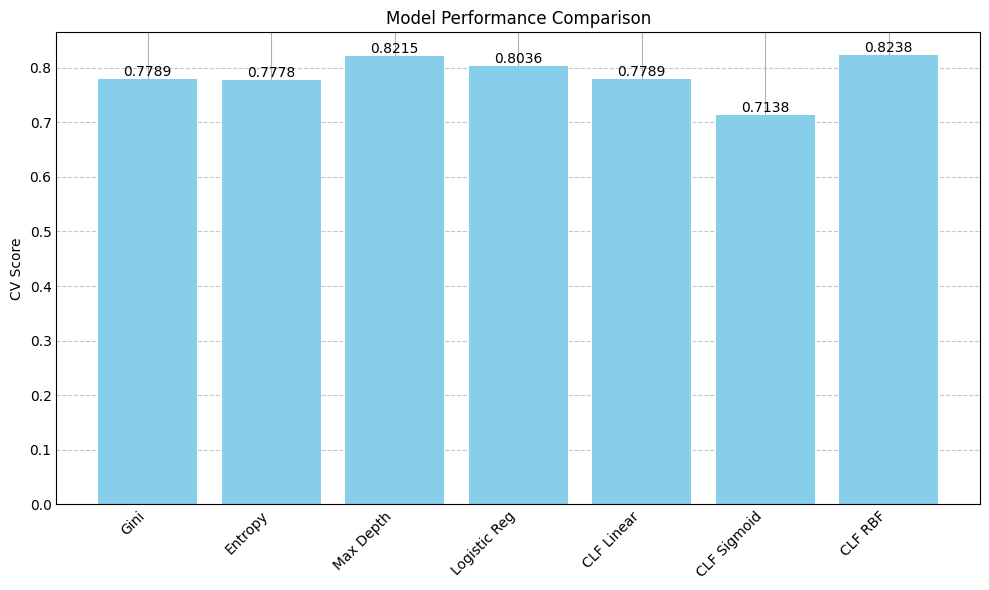

In [461]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Calculate scores once to avoid recalculating
scores = [cross_val_score(model, X_train_scaled, y_train, cv=5).mean() 
          for model in models.values()]

# Create bars
bars = ax.bar(models.keys(), scores, color='skyblue')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance Comparison')
plt.ylabel('CV Score')

# Add grid and mean line (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [462]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Define the models
models = {
    'Gini': decision_tree_gini,
    'Entropy': decision_tree_ent,
    'Max Depth': decision_tree_depth,
    'Logistic Reg': log_reg,
    'CLF Linear':clflinear,
    'CLF Sigmoid' : clfsigmoid,
    'CLF RBF':clfrbf
}

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform LOOCV for each model
for name, model in models.items():
    # Get cross-validation scores using LOOCV
    cv_scores_loo = cross_val_score(model, X_train_scaled, y_train, cv=loo)
    print(f"{name} LOOCV Score: {cv_scores_loo.mean():.4f} (+/- {cv_scores_loo.std() * 2:.4f})")

Gini LOOCV Score: 0.8025 (+/- 0.7963)
Entropy LOOCV Score: 0.7811 (+/- 0.8269)
Max Depth LOOCV Score: 0.8339 (+/- 0.7444)
Logistic Reg LOOCV Score: 0.8103 (+/- 0.7841)
CLF Linear LOOCV Score: 0.7868 (+/- 0.8192)
CLF Sigmoid LOOCV Score: 0.7183 (+/- 0.8997)
CLF RBF LOOCV Score: 0.8283 (+/- 0.7543)


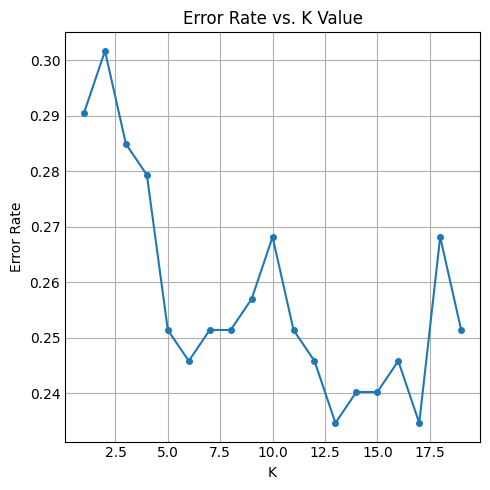

In [463]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Getting our K value
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_split, y_train_split)
    knn_pred = knn.predict(X_val_split)
    error_rate.append(np.mean(knn_pred != y_val_split))

plt.figure(figsize=(5, 5))
plt.plot(range(1, 20), error_rate, marker='o', markersize=4)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()